# Future Price Time Series Model Wards 5 & 6

In [1]:
# ResidentialSalesWithLocation_CSV

setwd("D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report")  #set my working directory
getwd()

HOUSE.df <- read.csv("ResidentialSalesWithLocation_CSV.csv", header = TRUE)  #import data into R

######################### Verify the data ##########################
head(HOUSE.df)   #Verify the first five rows of the dataframe

tail(HOUSE.df)   #Verify the last five rows of the dataframe

summary(HOUSE.df)   #To check the variables and counts

str(HOUSE.df)   #To check the data structure of the loaded dataset
####################################################################

[1] "D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report"

,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,0150 0275,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407639,Old City 2,Ward 1,38.91745,-77.04023,5
2,0150 0276,1,0,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407640,Old City 2,Ward 1,38.91745,-77.04017,1
3,0150 0277,1,0,13,Hot Water Rad,N,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407641,Old City 2,Ward 1,38.91745,-77.04012,1
4,0150 0278,2,1,7,Warm Cool,Y,1,6,2,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407642,Old City 2,Ward 1,38.91745,-77.04006,5
5,0150 0279,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407643,Old City 2,Ward 1,38.91745,-77.04000,1
6,0150 0280,1,1,7,Warm Cool,Y,1,6,3,1910,⋯,1,11,960,2022/08/31 05:17:11+00,74407644,Old City 2,Ward 1,38.91745,-77.03995,1


,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
108398,PAR 01550236,2,0,13,Hot Water Rad,N,1,6,2,1934,⋯,1,12,4571,2022/08/31 05:17:11+00,74624612,Woodridge,Ward 5,38.92890,-76.97456,1
108399,PAR 01550251,2,0,1,Forced Air,Y,1,6,3,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624613,Woodridge,Ward 5,38.92700,-76.97157,4
108400,PAR 01550252,1,0,13,Hot Water Rad,N,1,5,2,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624614,Woodridge,Ward 5,38.92706,-76.97145,1
108401,PAR 01550254,3,0,13,Hot Water Rad,N,1,5,3,1922,⋯,0,12,7829,2022/08/31 05:17:11+00,74624615,Woodridge,Ward 5,38.92790,-76.97388,2
108402,PAR 01550255,3,1,1,Forced Air,Y,1,10,4,1925,⋯,0,13,4001,2022/08/31 05:17:11+00,74624616,Woodridge,Ward 5,38.92924,-76.97320,4
108403,PAR 01550259,1,0,13,Hot Water Rad,N,1,6,3,1940,⋯,0,11,1399,2022/08/31 05:17:11+00,74624617,Woodridge,Ward 5,38.92924,-76.97465,1


     SSL                BATHRM         HF_BATHRM            HEAT      
 Length:108403      Min.   : 0.000   Min.   : 0.0000   Min.   : 0.00  
 Class :character   1st Qu.: 1.000   1st Qu.: 0.0000   1st Qu.: 1.00  
 Mode  :character   Median : 2.000   Median : 1.0000   Median : 7.00  
                    Mean   : 2.124   Mean   : 0.6298   Mean   : 7.27  
                    3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.:13.00  
                    Max.   :30.000   Max.   :12.0000   Max.   :13.00  
                    NA's   :1371     NA's   :1371      NA's   :1371   
    HEAT_D               AC              NUM_UNITS          ROOMS        
 Length:108403      Length:108403      Min.   : 0.000   Min.   :  0.000  
 Class :character   Class :character   1st Qu.: 1.000   1st Qu.:  6.000  
 Mode  :character   Mode  :character   Median : 1.000   Median :  7.000  
                                       Mean   : 1.196   Mean   :  7.397  
                                       3rd Qu.: 1.000   3rd Qu

'data.frame':	108403 obs. of  44 variables:
 $ SSL              : chr  "0150    0275" "0150    0276" "0150    0277" "0150    0278" ...
 $ BATHRM           : int  1 1 1 2 1 1 2 1 1 1 ...
 $ HF_BATHRM        : int  1 0 0 1 1 1 1 1 1 1 ...
 $ HEAT             : int  7 7 13 7 7 7 7 7 7 7 ...
 $ HEAT_D           : chr  "Warm Cool" "Warm Cool" "Hot Water Rad" "Warm Cool" ...
 $ AC               : chr  "Y" "Y" "N" "Y" ...
 $ NUM_UNITS        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS            : int  6 6 6 6 6 6 6 6 6 6 ...
 $ BEDRM            : int  3 3 3 2 3 3 2 3 3 3 ...
 $ AYB              : int  1900 1900 1900 1900 1900 1910 1900 1900 1900 1900 ...
 $ YR_RMDL          : int  2004 NA NA 2016 NA NA 2001 NA 2003 2015 ...
 $ EYB              : int  1971 1961 1961 1971 1961 1968 1971 1971 1971 1961 ...
 $ STORIES          : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE         : chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE     

In [2]:
################################################################################
# Create a new data set for the total population
# Three features, "SALEDATE", "PRICE", and "Ward"

HOUSE_TS1.df <- subset(HOUSE.df, select = c(SALEDATE, PRICE, WARD))

head(HOUSE_TS1.df)     #Verify the first five rows of the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts

str(HOUSE_TS1.df)   #To check the data structure of the loaded dataset
################################################################################

,SALEDATE,PRICE,WARD
,<chr>,<int>,<chr>
1,2013/07/22 00:00:00+00,755000,Ward 1
2,1900/01/01 00:00:00+00,NA,Ward 1
3,1996/02/12 00:00:00+00,118000,Ward 1
4,2022/04/06 00:00:00+00,1110000,Ward 1
5,2017/03/24 00:00:00+00,0,Ward 1
6,2000/06/30 00:00:00+00,251000,Ward 1


   SALEDATE             PRICE              WARD          
 Length:108403      Min.   :       0   Length:108403     
 Class :character   1st Qu.:       0   Class :character  
 Mode  :character   Median :  294000   Mode  :character  
                    Mean   :  465255                     
                    3rd Qu.:  715000                     
                    Max.   :25100000                     
                    NA's   :14181                        

'data.frame':	108403 obs. of  3 variables:
 $ SALEDATE: chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE   : int  755000 NA 118000 1110000 0 251000 930388 606500 0 162000 ...
 $ WARD    : chr  "Ward 1" "Ward 1" "Ward 1" "Ward 1" ...


In [3]:
################################################################################
# Remove 0s and NA's from the "PRICE" variable
HOUSE_TS1.df[HOUSE_TS1.df==0] <- NA     # Set all 0s to NA

HOUSE_TS1.df <- na.omit(HOUSE_TS1.df)     # Removes all NA's from the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts
################################################################################

   SALEDATE             PRICE              WARD          
 Length:62008       Min.   :       1   Length:62008      
 Class :character   1st Qu.:  300000   Class :character  
 Mode  :character   Median :  557985   Mode  :character  
                    Mean   :  706961                     
                    3rd Qu.:  894000                     
                    Max.   :25100000                     

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpAtO03n\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpAtO03n\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




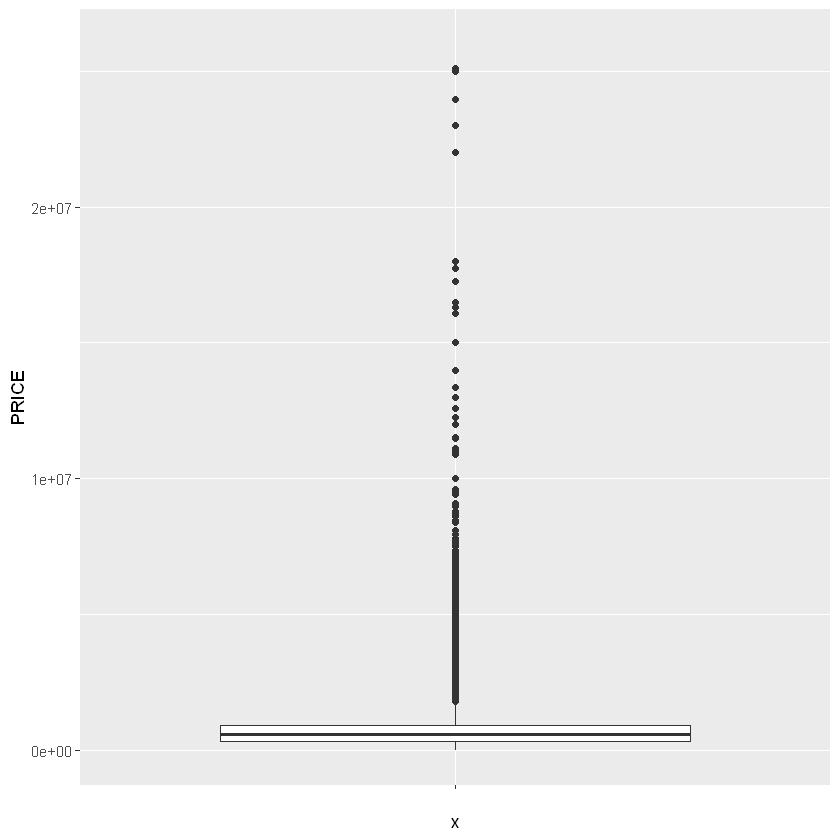

In [4]:
################################################################################
# Boxplot of the "PRICE" variable
# Install packages
install.packages("ggplot2")
install.packages("dplyr")
library("ggplot2")
library("dplyr")

# Create boxplot of the "PRICE" variable 
ggplot(data = HOUSE_TS1.df, aes(x = "", y = PRICE)) + 
  geom_boxplot() +
  coord_cartesian(ylim = c(0, 26000000)) # Set the y axis scale
################################################################################

In [5]:
################################################################################
# Install packages to work with dates
install.packages("lubridate")  # general package for handling and converting dates)
install.packages("linelist")   # has function to "guess" messy dates
install.packages("aweek")      # another option for converting dates to weeks, and weeks to dates
install.packages("zoo")        # additional date/time functions
install.packages("tidyverse")  # data management and visualization  
install.packages("rio")        # data import/export
library("lubridate")  
library("linelist")   
library("aweek")      
library("zoo")        
library("tidyverse")    
library("rio")   
################################################################################

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'lubridate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lubridate'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\lubridate\libs\x64\lubridate.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\lubridate\libs\x64\lubridate.dll: Permission denied"
Warning message:
"restored 'lubridate'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpAtO03n\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'linelist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpAtO03n\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'aweek' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpAtO03n\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'zoo' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'zoo'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\zoo\libs\x64\zoo.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\zoo\libs\x64\zoo.dll: Permission denied"
Warning message:
"restored 'zoo'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpAtO03n\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpAtO03n\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpAtO03n\downloaded_packages



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [6]:
################################################################################
# Clean up Date attribute
class(HOUSE_TS1.df$SALEDATE)   #Check the class of the "SALEDATE" field

# Because "SALEDATE" is class 'character', we must convert it to class 'Date'
# Tell R how to identify the date parts of the "SALEDATE" field
# The format = argument specifies the date components and 
# drops the time component in the "SALEDATE'
HOUSE_TS1.df$SALEDATE <- as.Date(HOUSE_TS1.df$SALEDATE, format = "%Y/%m/%d")

head(HOUSE_TS1.df)   # Verify the time component was dropped

class(HOUSE_TS1.df$SALEDATE)   # Check the class of the "SALEDATE" field 

# Drop the 'day' from the date
HOUSE_TS2.df <- HOUSE_TS1.df
HOUSE_TS2.df$SALEDATE <- format(HOUSE_TS2.df$SALEDATE, format = "%Y-%m")

head(HOUSE_TS2.df)   # Verify the day component was dropped
################################################################################

[1] "character"

,SALEDATE,PRICE,WARD
,<date>,<int>,<chr>
1,2013-07-22,755000,Ward 1
3,1996-02-12,118000,Ward 1
4,2022-04-06,1110000,Ward 1
6,2000-06-30,251000,Ward 1
7,2021-11-22,930388,Ward 1
8,2006-02-06,606500,Ward 1


[1] "Date"

,SALEDATE,PRICE,WARD
,<chr>,<int>,<chr>
1,2013-07,755000,Ward 1
3,1996-02,118000,Ward 1
4,2022-04,1110000,Ward 1
6,2000-06,251000,Ward 1
7,2021-11,930388,Ward 1
8,2006-02,606500,Ward 1


In [7]:
################################################################################
# Filter database for only Wards 5 & 6

HOUSE_TS2.df <- subset(HOUSE_TS2.df, WARD %in% c("Ward 5", "Ward 6"))

summary(HOUSE_TS2.df)     #To check the variables and counts

str(HOUSE_TS2.df)   #To check the data structure

# Create a new data set for the Ward 1 &2 population
# Drop the Ward attribute and keep two features, "SALEDATE", "PRICE"

HOUSE_TS2.df <- subset(HOUSE_TS2.df, select = c(SALEDATE, PRICE))

head(HOUSE_TS2.df)     #Verify the first five rows of the dataframe

################################################################################

   SALEDATE             PRICE              WARD          
 Length:17687       Min.   :       1   Length:17687      
 Class :character   1st Qu.:  340000   Class :character  
 Mode  :character   Median :  580000   Mode  :character  
                    Mean   :  627596                     
                    3rd Qu.:  825000                     
                    Max.   :13350000                     

'data.frame':	17687 obs. of  3 variables:
 $ SALEDATE: chr  "2009-05" "2001-09" "2021-12" "2001-08" ...
 $ PRICE   : int  750000 349675 1000000 400440 729900 880000 350172 425000 920000 1035000 ...
 $ WARD    : chr  "Ward 6" "Ward 6" "Ward 6" "Ward 6" ...


,SALEDATE,PRICE
,<chr>,<int>
3317,2009-05,750000
3320,2001-09,349675
3324,2021-12,1000000
3325,2001-08,400440
3326,2013-11,729900
3327,2018-08,880000


In [8]:
################################################################################
# Calculate the mean "Price" by "SALEDATE" (year and month)
HOUSE_TS3.df <- HOUSE_TS2.df
HOUSE_TS3.df <- aggregate(PRICE~SALEDATE,HOUSE_TS2.df,mean)

summary(HOUSE_TS2.df)   #To check the variables and counts before the aggregation

summary(HOUSE_TS3.df)   #To check the variables and counts after the aggregation

head(HOUSE_TS3.df, 20)

tail(HOUSE_TS3.df, 20)

# Filter the dataframe for only sales after 2010-01
HOUSE_TS4.df <- HOUSE_TS3.df
HOUSE_TS4.df <- HOUSE_TS4.df %>% filter(SALEDATE > '2010-01')

summary(HOUSE_TS4.df)   #To check the variables and counts

str(HOUSE_TS4.df)   #To check the data structure   
################################################################################

   SALEDATE             PRICE         
 Length:17687       Min.   :       1  
 Class :character   1st Qu.:  340000  
 Mode  :character   Median :  580000  
                    Mean   :  627596  
                    3rd Qu.:  825000  
                    Max.   :13350000  

   SALEDATE             PRICE        
 Length:372         Min.   :  82325  
 Class :character   1st Qu.: 180352  
 Mode  :character   Median : 445432  
                    Mean   : 447061  
                    3rd Qu.: 629630  
                    Max.   :1239480  

,SALEDATE,PRICE
,<chr>,<dbl>
1,1988-08,322000.00
2,1990-09,110000.00
3,1990-12,127000.00
4,1991-03,189900.00
5,1991-11,175000.00
6,1992-01,148217.11
7,1992-02,241666.67
8,1992-03,170377.62
9,1992-04,133277.27


,SALEDATE,PRICE
,<chr>,<dbl>
353,2021-01,845624.8
354,2021-02,859890.3
355,2021-03,902017.3
356,2021-04,982050.4
357,2021-05,998431.0
358,2021-06,991895.4
359,2021-07,969982.4
360,2021-08,923534.1
361,2021-09,864911.2


   SALEDATE             PRICE        
 Length:151         Min.   : 391795  
 Class :character   1st Qu.: 559571  
 Mode  :character   Median : 710636  
                    Mean   : 703653  
                    3rd Qu.: 818181  
                    Max.   :1239480  

'data.frame':	151 obs. of  2 variables:
 $ SALEDATE: chr  "2010-02" "2010-03" "2010-04" "2010-05" ...
 $ PRICE   : num  561495 485623 494201 391795 434513 ...


In [9]:
####################################################################
# Set time series (ts) for 'PRICE' variable

# Choose the 'PRICE' column and convert it to ts object

H_TS <- ts(HOUSE_TS4.df$PRICE, start=c(2010, 1), freq=12)

# Let us see the ts object

H_TS
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,561494.6,485622.9,494200.6,391794.7,434512.9,444358.6,467701.5,442562.7,449942.7,531324.4,443072.1,464226.3
2011,397547.7,393553.1,440508.8,438331.5,478920.0,628580.4,477412.2,477978.3,435526.4,456003.2,471751.2,423120.9
2012,523658.5,476313.6,489041.0,557646.5,539773.2,485144.9,569087.9,519407.0,572041.9,526246.3,553143.6,556963.8
2013,570290.8,535786.0,599875.1,637307.2,621681.1,710635.9,564370.1,1239480.0,583495.3,537368.6,564300.4,518638.8
2014,523101.3,542129.9,551666.0,600209.4,642663.2,644199.8,614847.6,643831.8,579811.7,595820.2,610795.8,583938.6
2015,661746.6,615426.5,650252.7,893476.3,643912.1,642459.2,627315.6,664169.1,752480.5,686783.4,725348.6,632777.9
2016,613772.3,609908.6,751432.0,701354.2,736974.6,785349.7,735473.0,773069.9,694000.8,793789.4,656729.1,682598.8
2017,661009.7,723718.6,797514.7,783807.8,799304.3,726467.6,758984.6,745139.2,815874.1,781035.1,706187.3,764130.1
2018,719542.9,765458.1,811969.3,808999.4,820488.1,795864.3,801122.9,764966.5,833967.7,806479.6,796623.2,884972.7
2019,781429.2,808093.6,813899.0,874732.8,840144.3,827100.8,747031.5,765453.5,871393.5,788044.2,835600.8,793255.5


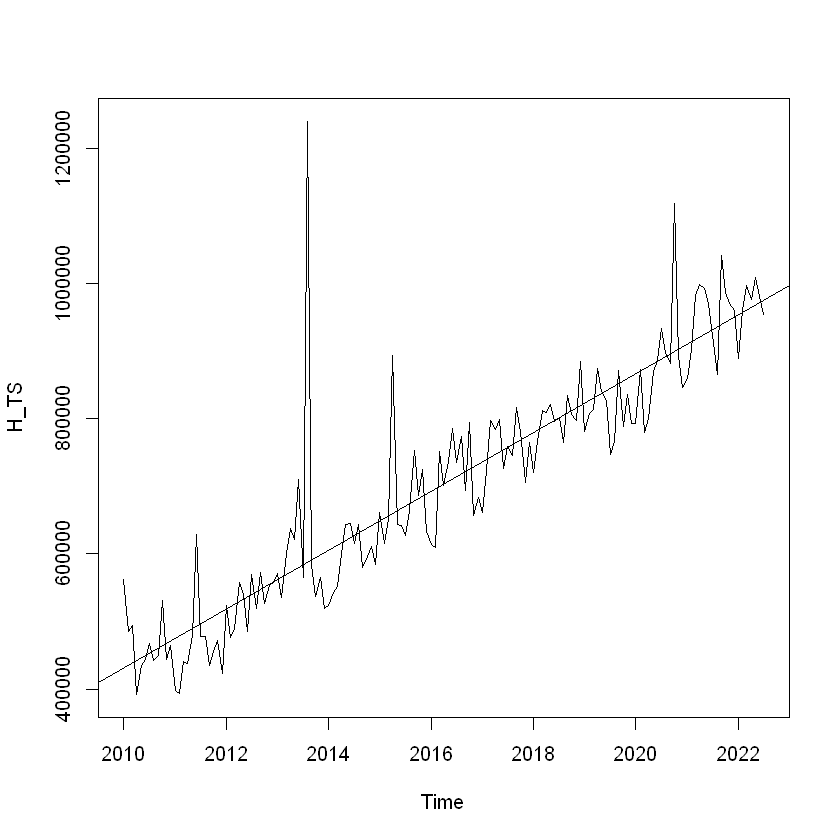

In [10]:
#####################################################################
# Let us fit a regression line on the dataset

plot(H_TS)

abline(reg=lm(H_TS~time(H_TS)))
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,1,2,3,4,5,6,7,8,9,10,11,12
2011,1,2,3,4,5,6,7,8,9,10,11,12
2012,1,2,3,4,5,6,7,8,9,10,11,12
2013,1,2,3,4,5,6,7,8,9,10,11,12
2014,1,2,3,4,5,6,7,8,9,10,11,12
2015,1,2,3,4,5,6,7,8,9,10,11,12
2016,1,2,3,4,5,6,7,8,9,10,11,12
2017,1,2,3,4,5,6,7,8,9,10,11,12
2018,1,2,3,4,5,6,7,8,9,10,11,12
2019,1,2,3,4,5,6,7,8,9,10,11,12


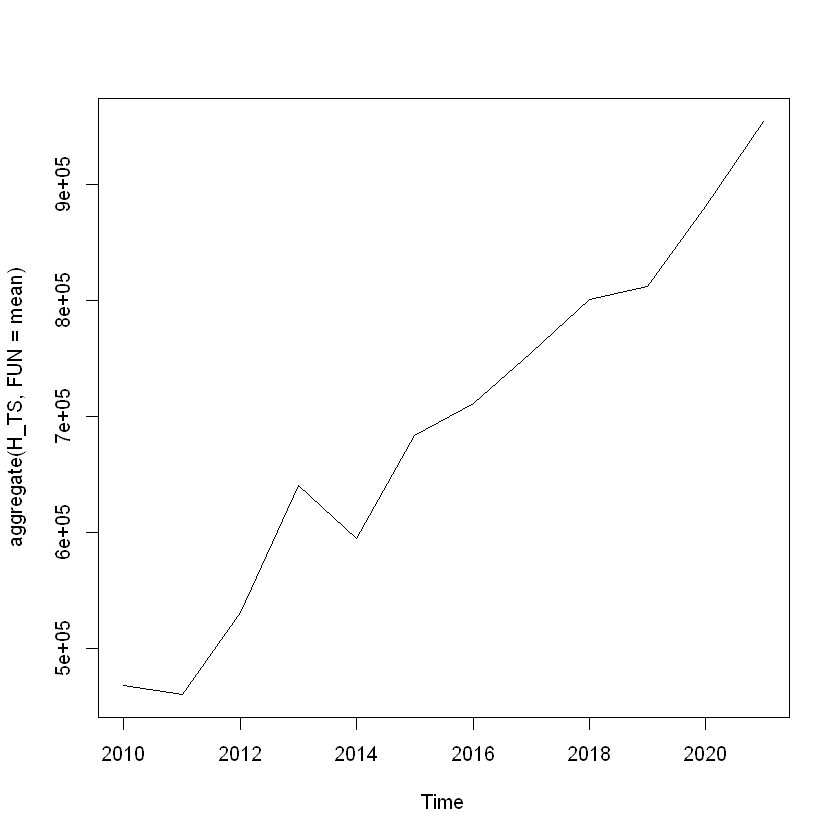

In [11]:
#####################################################################
# First let us plot the cycle and trend
# Aggregate the cycles and display a year-on-year trend

cycle(H_TS)

plot(aggregate(H_TS,FUN=mean))

#####################################################################

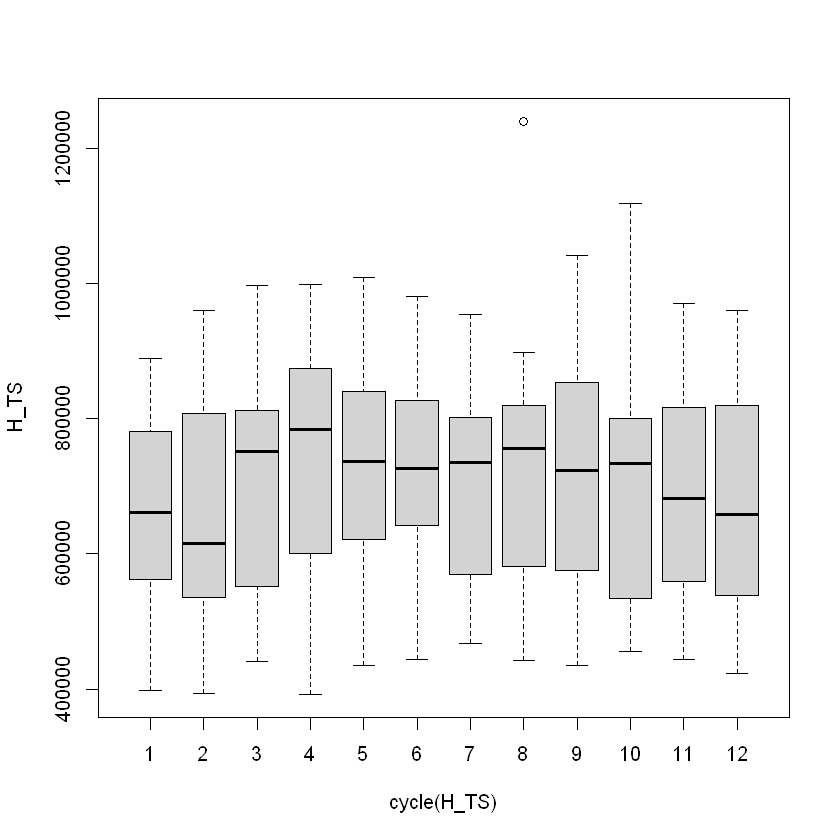

In [12]:
#####################################################################
# Letâ™s look in to the seasonal effects

boxplot(H_TS~cycle(H_TS))

#####################################################################

In [13]:
#####################################################################
# Since we want to remove the unequal variances in the data we will take the log of the series
# Before we fit the ARIMA model to our time series, we need to remove the unequal variances in 
# the data by taking the log of the series.

# Also, the original signal had trends and seasonal effects, so it was not stationary.  
# Therefore, we perform a diff of the signal and check if the trends and seasonal effect can be removed. 


library(tseries)

# Now perform the Augmented Dickey-Fuller Test

adf.test(diff(log(H_TS)), alternative="stationary", k=0)

# This will give you the result of the Augmented Dickey-Fuller Test
#####################################################################

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(diff(log(H_TS)), alternative = "stationary", k = 0):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(log(H_TS))
Dickey-Fuller = -21.155, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


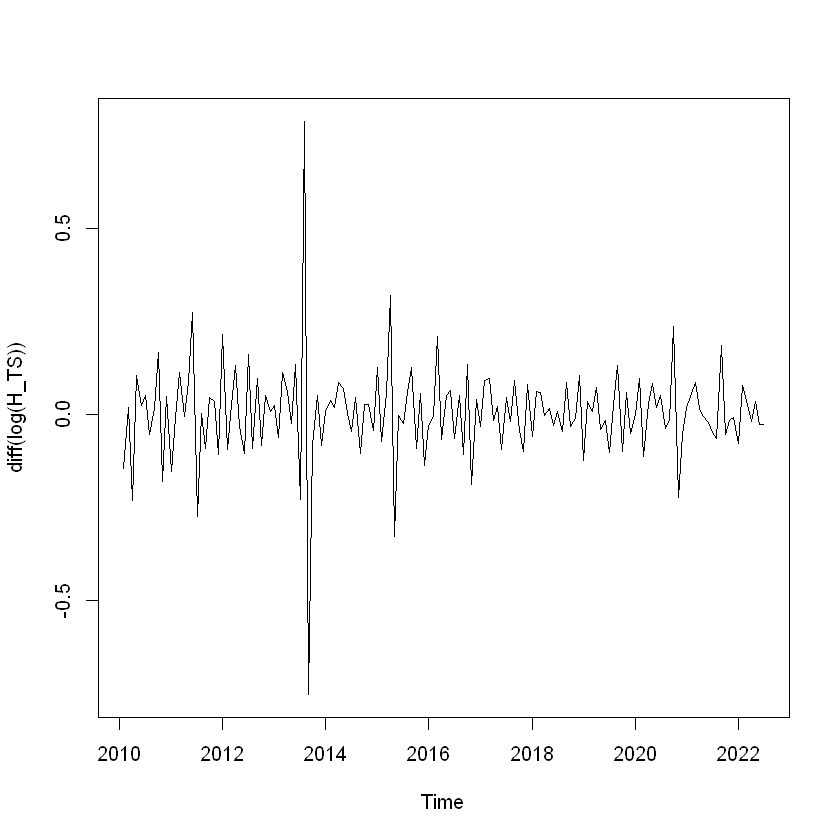

In [14]:
#####################################################################
# Let us now plot the series

plot(diff(log(H_TS)))

#####################################################################

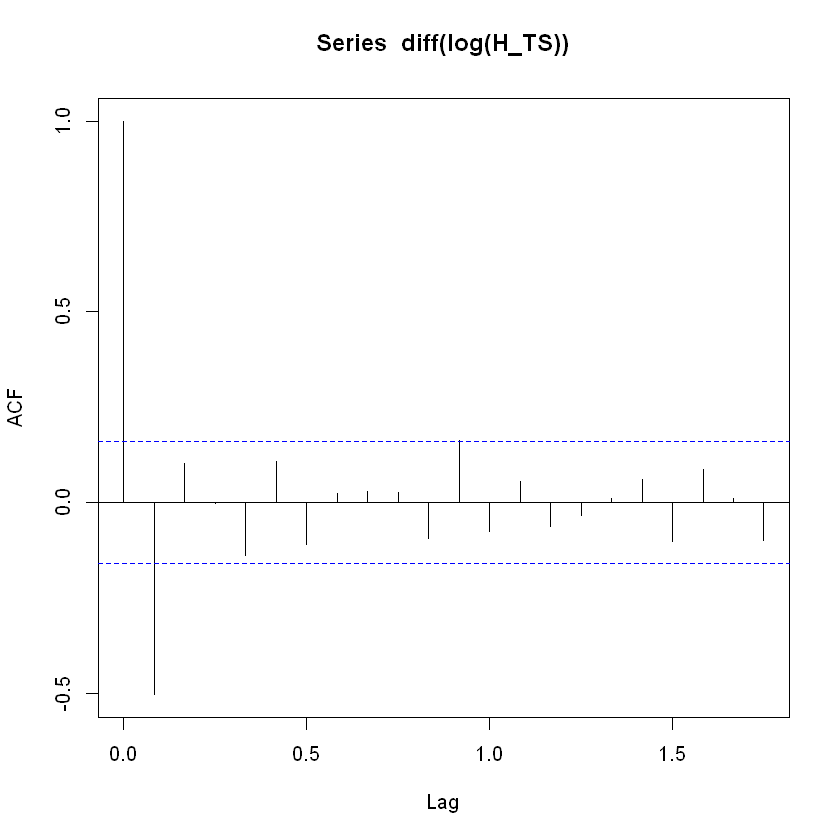

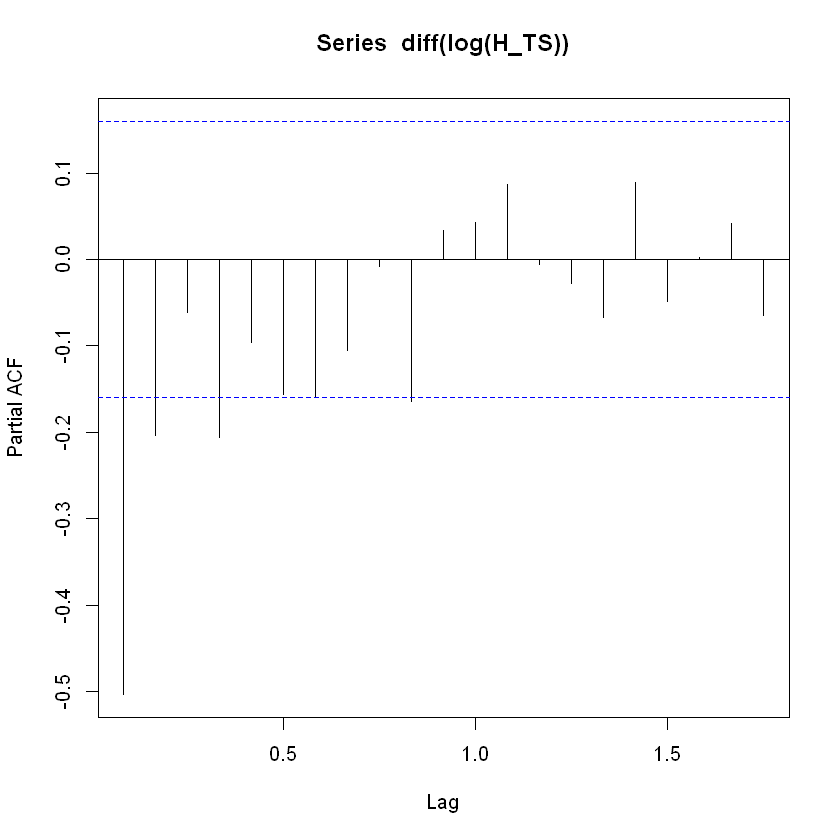

In [15]:
#####################################################################
# Now let us look into the ACF  and PACF charts

acf(diff(log(H_TS)))

pacf(diff(log(H_TS)))

# ARIMA (1,1,2)

#####################################################################

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'forecast' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'forecast'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\forecast\libs\x64\forecast.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\forecast\libs\x64\forecast.dll: Permission denied"
Warning message:
"restored 'forecast'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpAtO03n\downloaded_packages


Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"



Call:
arima(x = log(H_TS), order = c(2, 1, 2), seasonal = list(order = c(2, 1, 2), 
    period = 12))

Coefficients:
         ar1     ar2      ma1     ma2     sar1     sar2     sma1     sma2
      0.1242  0.1106  -0.9772  0.0315  -0.6627  -0.0676  -0.2781  -0.4494
s.e.  0.5256  0.1079   0.5241  0.4813      NaN      NaN      NaN      NaN

sigma^2 estimated as 0.01156:  log likelihood = 102.51,  aic = -187.02

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.003473941,0.1028413,0.06646516,0.02422184,0.494017,0.7975407,0.02261572


Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"



Call:
arima(x = log(H_TS), order = c(2, 1, 2), seasonal = list(order = c(2, 1, 2), 
    period = 12))

Coefficients:
         ar1     ar2      ma1     ma2     sar1     sar2     sma1     sma2
      0.1242  0.1106  -0.9772  0.0315  -0.6627  -0.0676  -0.2781  -0.4494
s.e.  0.5256  0.1079   0.5241  0.4813      NaN      NaN      NaN      NaN

sigma^2 estimated as 0.01156:  log likelihood = 102.51,  aic = -187.02

Training set error measures:
                      ME      RMSE        MAE        MPE     MAPE      MASE
Training set 0.003473941 0.1028413 0.06646516 0.02422184 0.494017 0.7975407
                   ACF1
Training set 0.02261572


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)(2,1,2)[12]
Q* = 17.808, df = 16, p-value = 0.3352

Model df: 8.   Total lags used: 24



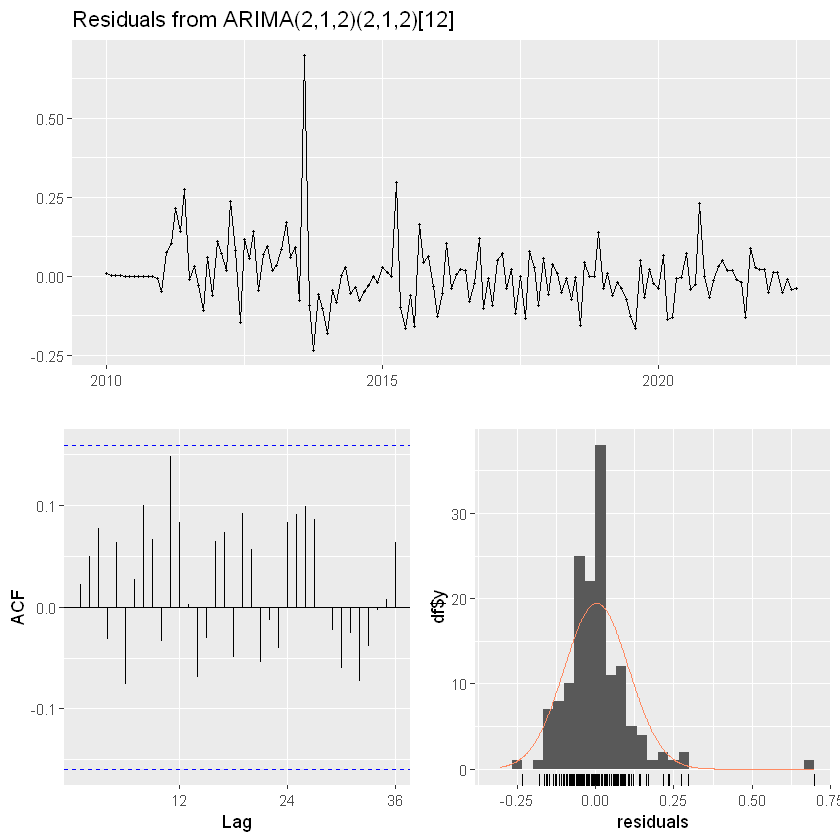

In [16]:
install.packages("forecast") 
library(forecast) 

#####################################################################
# Let us now fit the ARIMA(2,1,2)

(fit_open <- arima(log(H_TS), c(2, 1, 2),seasonal = list(order = c(2, 1, 2), period = 12)))

# Produce error measures
accuracy(fit_open)

# Examine the AIC
summary(fit_open)

# Examine the Residuals
checkresiduals(fit_open) 

#####################################################################

In [17]:
#####################################################################
# Let us now fit the ARIMA(4,1,2)

(fit_open <- arima(log(H_TS), c(4, 1, 2),seasonal = list(order = c(4, 1, 2), period = 12)))

#####################################################################

Warning message in log(s2):
"NaNs produced"



Call:
arima(x = log(H_TS), order = c(4, 1, 2), seasonal = list(order = c(4, 1, 2), 
    period = 12))

Coefficients:
          ar1     ar2     ar3      ar4     ma1      ma2     sar1    sar2
      -0.8174  0.1797  0.1003  -0.0480  0.0003  -0.8780  -0.9199  0.1041
s.e.   0.0178  0.0225  0.0187   0.0276  0.1682   0.0538   0.0193  0.0098
        sar3    sar4     sma1     sma2
      0.1792  0.0762  -0.0661  -0.9068
s.e.  0.0413  0.0140   0.0857   0.0316

sigma^2 estimated as 0.0104:  log likelihood = 104.76,  aic = -183.52


Call:
arima(x = log(H_TS), order = c(1, 1, 2), seasonal = list(order = c(1, 1, 2), 
    period = 12))

Coefficients:
          ar1     ma1      ma2     sar1     sma1     sma2
      -0.9295  0.1019  -0.8979  -0.2592  -0.6978  -0.0927
s.e.   0.0415  0.0919   0.0865   0.4568   0.4530   0.4199

sigma^2 estimated as 0.01133:  log likelihood = 102.68,  aic = -191.36

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.005868432,0.1018216,0.06580302,0.04186896,0.4891528,0.7895954,0.04690189



Call:
arima(x = log(H_TS), order = c(1, 1, 2), seasonal = list(order = c(1, 1, 2), 
    period = 12))

Coefficients:
          ar1     ma1      ma2     sar1     sma1     sma2
      -0.9295  0.1019  -0.8979  -0.2592  -0.6978  -0.0927
s.e.   0.0415  0.0919   0.0865   0.4568   0.4530   0.4199

sigma^2 estimated as 0.01133:  log likelihood = 102.68,  aic = -191.36

Training set error measures:
                      ME      RMSE        MAE        MPE      MAPE      MASE
Training set 0.005868432 0.1018216 0.06580302 0.04186896 0.4891528 0.7895954
                   ACF1
Training set 0.04690189


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)(1,1,2)[12]
Q* = 15.468, df = 18, p-value = 0.6296

Model df: 6.   Total lags used: 24



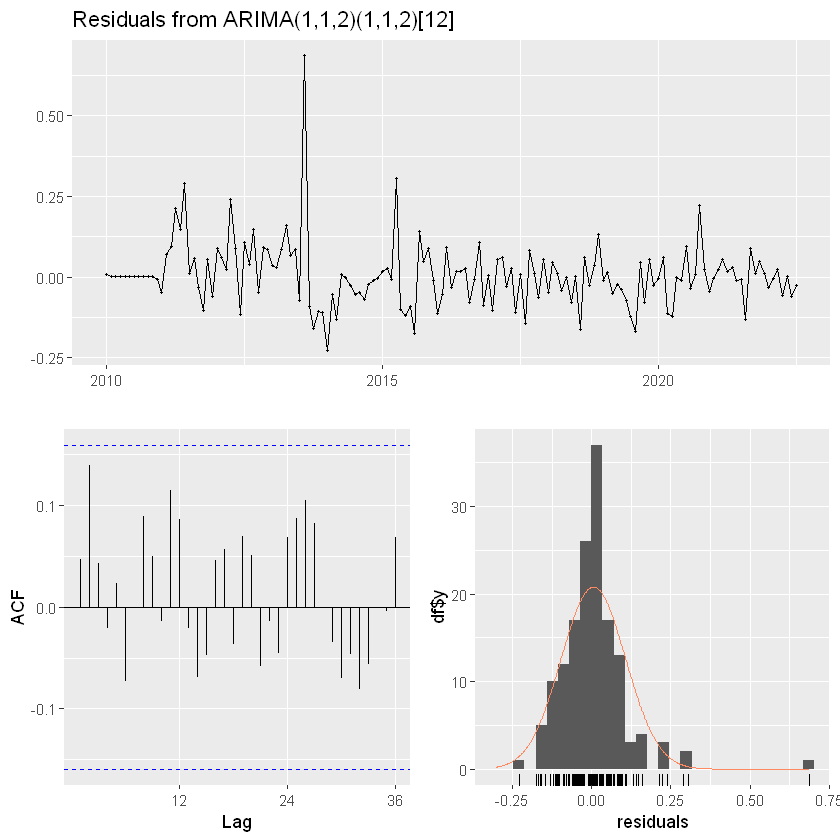

In [18]:
#####################################################################
# Let us now fit the ARIMA(1,1,2)

(fit_open <- arima(log(H_TS), c(1, 1, 2),seasonal = list(order = c(1, 1, 2), period = 12)))

# Produce error measures
accuracy(fit_open)

# Examine the AIC
summary(fit_open)

# Examine the Residuals
checkresiduals(fit_open) 

#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,NA,506735.2,466454.7,428075.7,426294.8,447732.9,455581.1,450692.4,468443.1,488915.9,470423.7,442268.1
2011,413218.7,406290.6,428225.5,449022.9,506188.0,553373.2,515345.8,467223.8,451258.6,454821.0,455656.6,460412.9
2012,486687.9,491331.7,503010.5,536026.8,530584.4,519787.7,535681.9,544985.9,547434.3,544419.5,547374.3,559340.5
2013,558332.8,560434.5,593210.9,624042.7,647826.4,651830.8,769714.1,906706.4,735959.8,555633.2,546152.0,531169.8
2014,526742.8,539756.8,561417.8,598687.0,632433.9,636477.6,629431.7,620580.8,599818.9,595562.0,600337.6,610104.9
2015,630714.6,635713.1,702352.0,770279.4,705939.9,639036.5,640314.8,677033.5,713978.4,712849.0,692564.6,651169.2
2016,617557.8,646255.4,703531.7,722778.7,740163.2,760786.7,757341.4,743903.4,738715.2,734577.1,697461.6,670734.1
2017,682084.2,726490.4,775639.0,791108.7,777221.0,752806.0,747394.0,766284.3,789480.6,771032.9,739385.0,738497.6
2018,742168.5,765607.1,799599.0,812614.0,811460.0,803334.9,790769.1,791255.9,809845.4,810887.5,821174.7,836999.4
2019,813981.2,802878.9,827656.1,850877.2,845530.6,810344.4,771654.4,787333.0,824071.2,820770.7,813125.3,803597.8


Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"


         Point Forecast    Lo 80   Hi 80      Lo 95   Hi 95
Jul 2022         981362 914733.4 1047991 879462.347 1083262
Aug 2022         981362 887073.6 1075650 837160.270 1125564
Sep 2022         981362 865803.6 1096920 804630.701 1158093
Oct 2022         981362 847834.1 1114890 777148.729 1185575
Nov 2022         981362 831969.2 1130755 752885.424 1209839
Dec 2022         981362 817596.0 1145128 730903.438 1231821
Jan 2023         981362 804350.5 1158373 710646.320 1252078
Feb 2023         981362 791996.0 1170728 691751.757 1270972
Mar 2023         981362 780368.0 1182356 673968.254 1288756
Apr 2023         981362 769346.9 1193377 657112.823 1305611
May 2023         981362 758842.3 1203882 641047.413 1321677
Jun 2023         981362 748784.1 1213940 625664.843 1337059
Jul 2023         981362 739116.8 1223607 610879.936 1351844
Aug 2023         981362 729795.1 1232929 596623.674 1366100
Sep 2023         981362 720782.0 1241942 582839.213 1379885
Oct 2023         981362 712046.2 1250678

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,3493.138,37249.86,25085.89,0.3618902,3.669281,0.4060563,0.3281508



	Ljung-Box test

data:  Residuals from ETS(M,N,N)
Q* = 73.166, df = 22, p-value = 2.082e-07

Model df: 2.   Total lags used: 24




Forecast method: ETS(M,N,N)

Model Information:
ETS(M,N,N) 

Call:
 ets(y = object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 460936.5932 

  sigma:  0.053

     AIC     AICc      BIC 
3875.887 3876.052 3884.899 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 3493.138 37249.86 25085.89 0.3618902 3.669281 0.4060563 0.3281508

Forecasts:
         Point Forecast    Lo 80   Hi 80      Lo 95   Hi 95
Jul 2022         981362 914733.4 1047991 879462.347 1083262
Aug 2022         981362 887073.6 1075650 837160.270 1125564
Sep 2022         981362 865803.6 1096920 804630.701 1158093
Oct 2022         981362 847834.1 1114890 777148.729 1185575
Nov 2022         981362 831969.2 1130755 752885.424 1209839
Dec 2022         981362 817596.0 1145128 730903.438 1231821
Jan 2023         981362 804350.5 1158373 710646.320 125

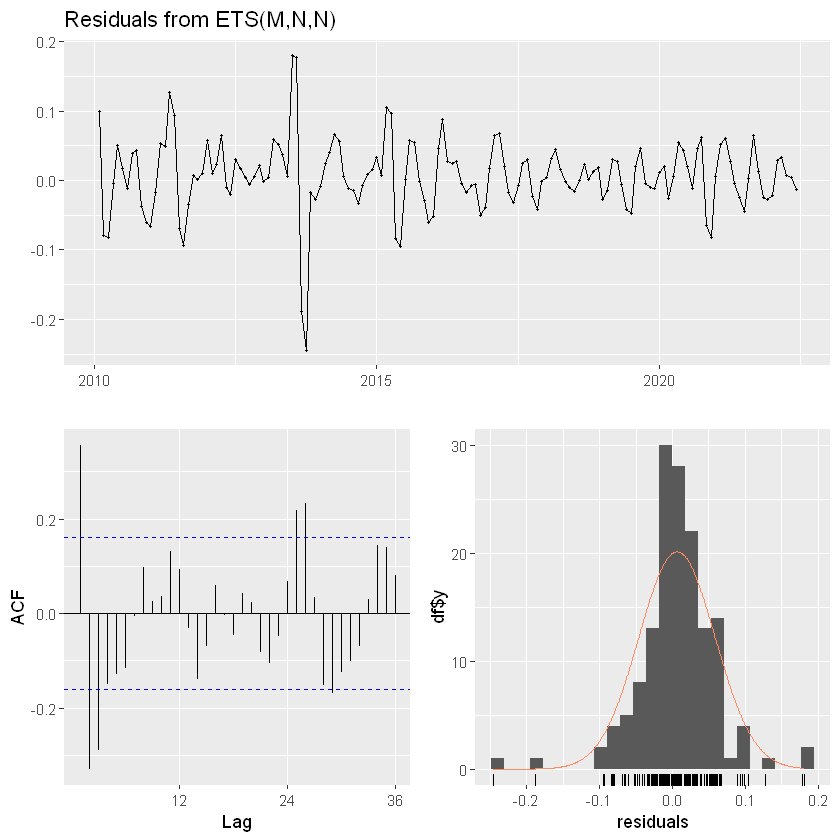

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jul 2022,981362,914733.4,1047991,879462.3,1083262
Aug 2022,981362,887073.6,1075650,837160.3,1125564
Sep 2022,981362,865803.6,1096920,804630.7,1158093
Oct 2022,981362,847834.1,1114890,777148.7,1185575
Nov 2022,981362,831969.2,1130755,752885.4,1209839
Dec 2022,981362,817596.0,1145128,730903.4,1231821
Jan 2023,981362,804350.5,1158373,710646.3,1252078
Feb 2023,981362,791996.0,1170728,691751.8,1270972
Mar 2023,981362,780368.0,1182356,673968.3,1288756


[1] 981362

[1] 0

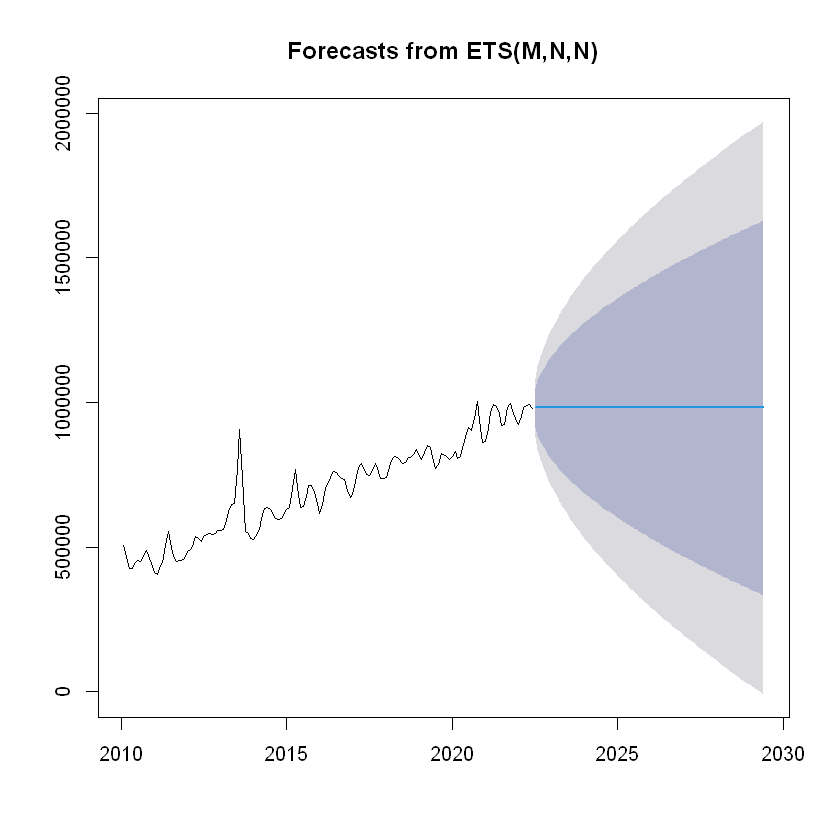

In [19]:
################################################################################
# Using Simple Moving Average
# forecasting model using SMA

SMA_fit <- ma(H_TS, order = 2)
SMA_fit

SMA_fit_pred <- forecast(SMA_fit, h=84)
SMA_fit_pred

# Examine model accuracy
accuracy(SMA_fit_pred)

# Examine the Residuals
checkresiduals(SMA_fit_pred) 

# Examine the AIC
summary(SMA_fit_pred)

plot(SMA_fit_pred)

# Calculate mean and standard deviation of the prediction
SMA_fit_pred_df <- as.data.frame(SMA_fit_pred)
SMA_fit_pred_df

MA_Avg.vF <- mean(SMA_fit_pred_df[ ,1])
MA_Avg.vF

MA_StandD <- sd(SMA_fit_pred_df[ ,1])
MA_StandD
################################################################################

In [20]:
#####################################################################
# Now let us do some prediction for the next 7 years

# Monthly Average Sale Price
pred_H_TS <- predict(fit_open, n.ahead = 7*12)

pred_H_TS

pred_H_TS$pred2 <- 2.71828^(pred_H_TS$pred)

pred_H_TS


# Calculate mean and standard deviation of the prediction
Avg.vF <- mean(pred_H_TS$pred2)
Avg.vF

StandD <- sd(pred_H_TS$pred2)
StandD

################################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,13.85189,13.82603,13.87765,13.79656,13.80259
2023,13.77799,13.82596,13.85461,13.90047,13.88874,13.90232,13.85872,13.88869,13.90669,13.92860,13.86905,13.86585
2024,13.83910,13.88528,13.92021,13.95010,13.95102,13.95358,13.91751,13.95338,13.96508,13.98998,13.92923,13.92435
2025,13.90194,13.94507,13.98163,14.01263,14.01309,14.01588,13.98030,14.01238,14.02782,14.04998,13.99137,13.98523
2026,13.96327,14.00573,14.04322,14.07268,14.07442,14.07606,14.04137,14.07349,14.08883,14.11090,14.05248,14.04597
2027,14.02454,14.06657,14.10439,14.13372,14.13562,14.13710,14.10260,14.13432,14.15005,14.17180,14.11365,14.10694
2028,14.08565,14.12753,14.16550,14.19465,14.19671,14.19805,14.16367,14.19533,14.21111,14.23280,14.17471,14.16793
2029,14.14672,14.18854,14.22657,14.25567,14.25777,14.25907,14.22473,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.1071836,0.1085653,0.1087098,0.1099463,0.1101330


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,13.85189,13.82603,13.87765,13.79656,13.80259
2023,13.77799,13.82596,13.85461,13.90047,13.88874,13.90232,13.85872,13.88869,13.90669,13.92860,13.86905,13.86585
2024,13.83910,13.88528,13.92021,13.95010,13.95102,13.95358,13.91751,13.95338,13.96508,13.98998,13.92923,13.92435
2025,13.90194,13.94507,13.98163,14.01263,14.01309,14.01588,13.98030,14.01238,14.02782,14.04998,13.99137,13.98523
2026,13.96327,14.00573,14.04322,14.07268,14.07442,14.07606,14.04137,14.07349,14.08883,14.11090,14.05248,14.04597
2027,14.02454,14.06657,14.10439,14.13372,14.13562,14.13710,14.10260,14.13432,14.15005,14.17180,14.11365,14.10694
2028,14.08565,14.12753,14.16550,14.19465,14.19671,14.19805,14.16367,14.19533,14.21111,14.23280,14.17471,14.16793
2029,14.14672,14.18854,14.22657,14.25567,14.25777,14.25907,14.22473,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.1071836,0.1085653,0.1087098,0.1099463,0.1101330


[1] 1247783

[1] 159338.8

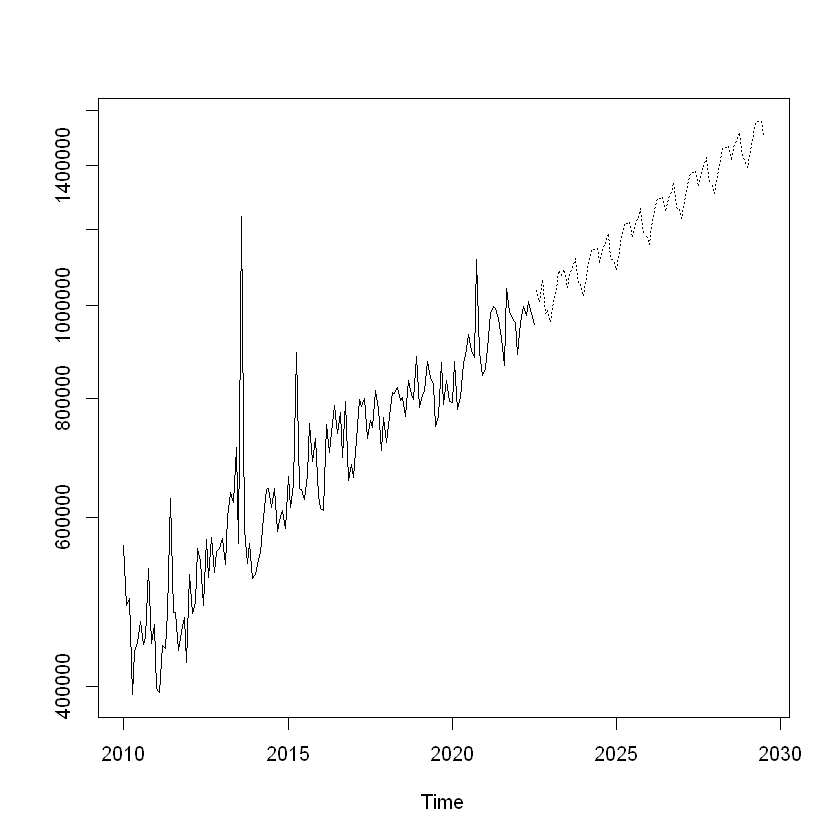

In [21]:
################################################################################

ts.plot(H_TS,2.71828^pred_H_TS$pred, log = "y", lty = c(1,3))

################################################################################

         Point Forecast    Lo 80   Hi 80    Lo 95   Hi 95
Aug 2022       970499.3 865637.3 1075361 810126.7 1130872
Sep 2022       970499.3 863071.9 1077927 806203.2 1134795
Oct 2022       970499.3 860566.3 1080432 802371.2 1138627
Nov 2022       970499.3 858116.5 1082882 798624.6 1142374
Dec 2022       970499.3 855719.0 1085280 794958.0 1146041
Jan 2023       970499.3 853370.6 1087628 791366.4 1149632
Feb 2023       970499.3 851068.4 1089930 787845.4 1153153
Mar 2023       970499.3 848809.7 1092189 784391.0 1156608
Apr 2023       970499.3 846592.1 1094407 780999.6 1159999
May 2023       970499.3 844413.6 1096585 777667.8 1163331
Jun 2023       970499.3 842272.1 1098727 774392.7 1166606
Jul 2023       970499.3 840165.7 1100833 771171.3 1169827
Aug 2023       970499.3 838092.9 1102906 768001.1 1172998
Sep 2023       970499.3 836052.0 1104947 764879.9 1176119
Oct 2023       970499.3 834041.6 1106957 761805.3 1179193
Nov 2023       970499.3 832060.4 1108938 758775.3 1182223
Dec 2023      

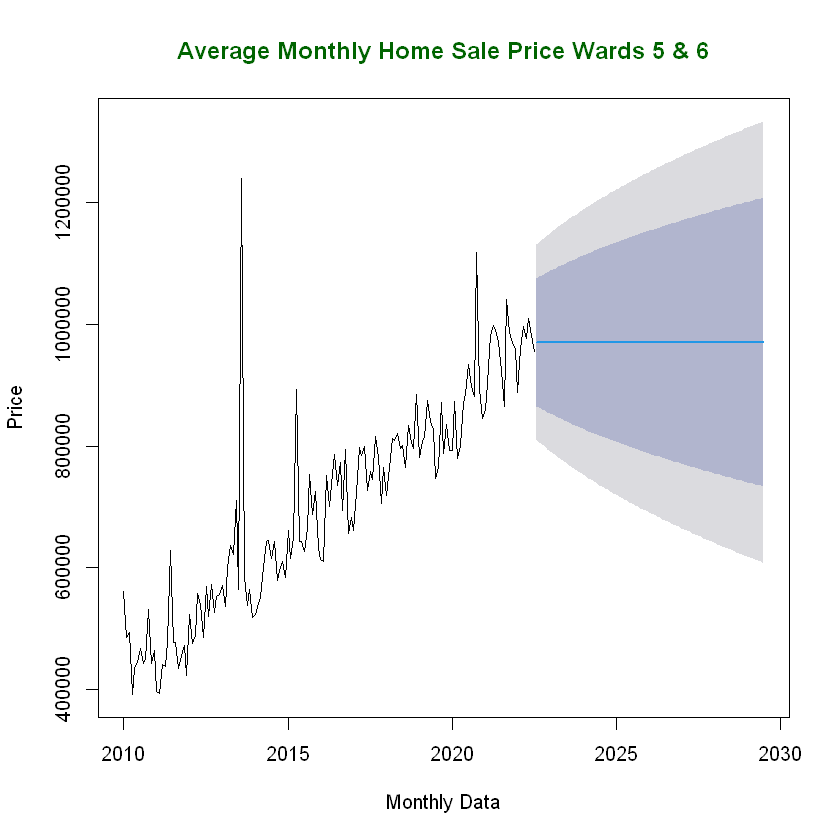

In [22]:
################################Using auto.arima################################
################################################################################

# forecasting model using arima model
fit <- auto.arima(H_TS)

# Next 84 forecasted values
forecast(fit, 84)

# plotting the graph with next
# 84 monthly forecasted values
plot(forecast(fit, 84), xlab ="Monthly Data",
     ylab ="Price",
     main ="Average Monthly Home Sale Price Wards 5 & 6", col.main ="darkgreen")

################################################################################

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,13482.3,81280.59,50011.08,0.8205071,7.09958,0.6488637,-0.01579701


Series: H_TS 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.7774
s.e.   0.0507

sigma^2 = 6.695e+09:  log likelihood = -1909.65
AIC=3823.3   AICc=3823.39   BIC=3829.33

Training set error measures:
                  ME     RMSE      MAE       MPE    MAPE      MASE        ACF1
Training set 13482.3 81280.59 50011.08 0.8205071 7.09958 0.6488637 -0.01579701


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 16.692, df = 23, p-value = 0.8241

Model df: 1.   Total lags used: 24



         Point Forecast    Lo 80   Hi 80    Lo 95   Hi 95
Aug 2022       970499.3 865637.3 1075361 810126.7 1130872
Sep 2022       970499.3 863071.9 1077927 806203.2 1134795
Oct 2022       970499.3 860566.3 1080432 802371.2 1138627
Nov 2022       970499.3 858116.5 1082882 798624.6 1142374
Dec 2022       970499.3 855719.0 1085280 794958.0 1146041
Jan 2023       970499.3 853370.6 1087628 791366.4 1149632
Feb 2023       970499.3 851068.4 1089930 787845.4 1153153
Mar 2023       970499.3 848809.7 1092189 784391.0 1156608
Apr 2023       970499.3 846592.1 1094407 780999.6 1159999
May 2023       970499.3 844413.6 1096585 777667.8 1163331
Jun 2023       970499.3 842272.1 1098727 774392.7 1166606
Jul 2023       970499.3 840165.7 1100833 771171.3 1169827
Aug 2023       970499.3 838092.9 1102906 768001.1 1172998
Sep 2023       970499.3 836052.0 1104947 764879.9 1176119
Oct 2023       970499.3 834041.6 1106957 761805.3 1179193
Nov 2023       970499.3 832060.4 1108938 758775.3 1182223
Dec 2023      

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aug 2022,970499.3,865637.3,1075361,810126.7,1130872
Sep 2022,970499.3,863071.9,1077927,806203.2,1134795
Oct 2022,970499.3,860566.3,1080432,802371.2,1138627
Nov 2022,970499.3,858116.5,1082882,798624.6,1142374
Dec 2022,970499.3,855719.0,1085280,794958.0,1146041
Jan 2023,970499.3,853370.6,1087628,791366.4,1149632
Feb 2023,970499.3,851068.4,1089930,787845.4,1153153
Mar 2023,970499.3,848809.7,1092189,784391.0,1156608
Apr 2023,970499.3,846592.1,1094407,780999.6,1159999


[1] 970499.3

[1] 0

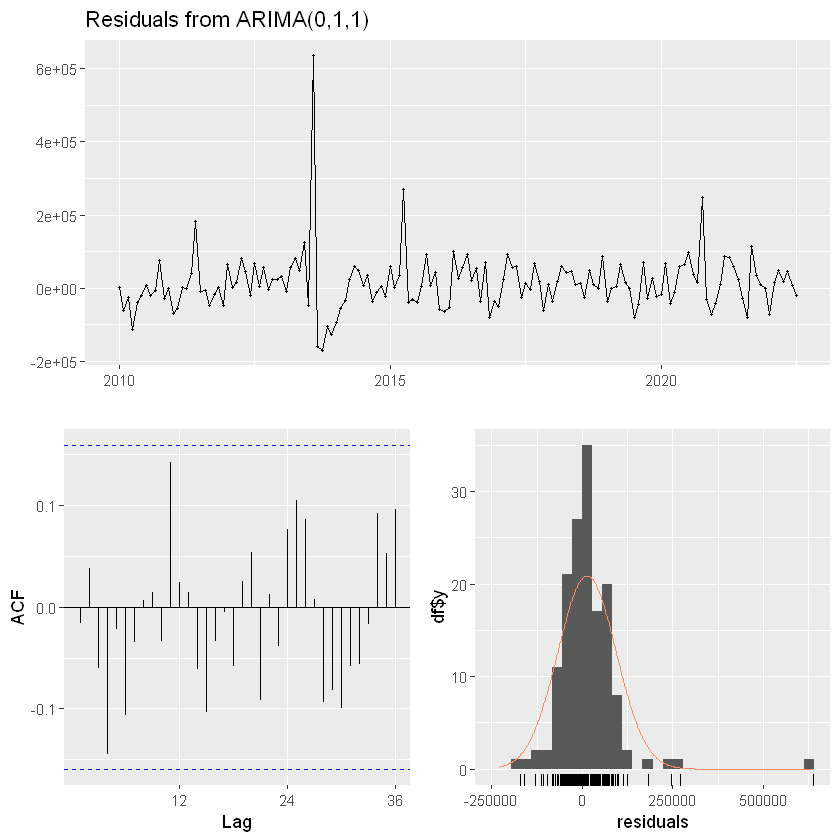

In [23]:
#####################################################################

# Produce error measures
accuracy(fit)

# Examine the AIC
summary(fit)

# Examine the Residuals
checkresiduals(fit) 

# Calculate mean and standard deviation of the prediction
Auto_A <- forecast(fit, 84)
Auto_A

Auto_A_df <- as.data.frame(Auto_A)
Auto_A_df

Auto_A_Avg.vF <- mean(Auto_A_df[ ,1])
Auto_A_Avg.vF

Auto_A_df_Stand <- sd(Auto_A_df[ ,1])
Auto_A_df_Stand
#####################################################################

In [24]:
#####################################################################
# Manipulate the Predicted Output into a Dataframe
pred_H_TS$pred2

# Converting to data frame
H_TS_DF <- as.data.frame(pred_H_TS$pred2)

H_TS_DF

# Changing the sales column name
colnames(H_TS_DF)[1] <- "Average Home Sale Price"

H_TS_DF

# Creating the 84 dates
Date <- seq(as.Date("2022/8/1"), by = "month", length.out = 84)
Date

# Adding the dates to the dataframe
H_TS_DF$Date <- Date

H_TS_DF

# Deleting the first column
# H_TS_DF_F <- H_TS_DF[-c(1)]
# H_TS_DF_F

# Re-order the columns
H_TS_DF_F <- H_TS_DF[, c(2, 1)]
H_TS_DF_F

# Generate output value based on date
OutP <- H_TS_DF_F[H_TS_DF_F$Date == '2022-12-01', ]
OutP
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,1037036.7,1010570.1,1064098.3,981221.9,987153.0
2023,963161.7,1010496.5,1039863.4,1088666.5,1075965.5,1090683.4,1044151.4,1075913.1,1095453.7,1119719.3,1054993.4,1051619.8
2024,1023862.0,1072253.6,1110362.5,1144061.4,1145106.3,1148038.8,1107368.2,1147817.4,1161323.1,1190603.5,1120426.8,1114974.2
2025,1090262.9,1138316.5,1180707.9,1217883.4,1218439.7,1221847.7,1179135.4,1217572.2,1236514.5,1264230.5,1192254.3,1184961.3
2026,1159218.1,1209499.0,1255712.7,1293245.8,1295509.1,1297637.1,1253387.8,1294299.7,1314312.9,1343630.6,1267392.3,1259164.3
2027,1232471.6,1285372.1,1334915.9,1374646.4,1377263.0,1379311.4,1332532.2,1375473.2,1397284.3,1428008.4,1347335.2,1338327.6
2028,1310130.3,1366172.5,1419045.3,1461007.5,1464027.4,1465987.3,1416446.4,1462006.1,1485264.7,1517832.0,1432174.6,1422498.6
2029,1392637.5,1452109.3,1508396.1,1552934.4,1556209.9,1558230.9,1505633.5,,,,,


x
<ts>
1037036.7
1010570.1
1064098.3
981221.9
987153.0
963161.7
1010496.5
1039863.4
1088666.5


Average Home Sale Price
<ts>
1037036.7
1010570.1
1064098.3
981221.9
987153.0
963161.7
1010496.5
1039863.4
1088666.5


[1] "2022-08-01" "2022-09-01" "2022-10-01" "2022-11-01" "2022-12-01"
 [6] "2023-01-01" "2023-02-01" "2023-03-01" "2023-04-01" "2023-05-01"
[11] "2023-06-01" "2023-07-01" "2023-08-01" "2023-09-01" "2023-10-01"
[16] "2023-11-01" "2023-12-01" "2024-01-01" "2024-02-01" "2024-03-01"
[21] "2024-04-01" "2024-05-01" "2024-06-01" "2024-07-01" "2024-08-01"
[26] "2024-09-01" "2024-10-01" "2024-11-01" "2024-12-01" "2025-01-01"
[31] "2025-02-01" "2025-03-01" "2025-04-01" "2025-05-01" "2025-06-01"
[36] "2025-07-01" "2025-08-01" "2025-09-01" "2025-10-01" "2025-11-01"
[41] "2025-12-01" "2026-01-01" "2026-02-01" "2026-03-01" "2026-04-01"
[46] "2026-05-01" "2026-06-01" "2026-07-01" "2026-08-01" "2026-09-01"
[51] "2026-10-01" "2026-11-01" "2026-12-01" "2027-01-01" "2027-02-01"
[56] "2027-03-01" "2027-04-01" "2027-05-01" "2027-06-01" "2027-07-01"
[61] "2027-08-01" "2027-09-01" "2027-10-01" "2027-11-01" "2027-12-01"
[66] "2028-01-01" "2028-02-01" "2028-03-01" "2028-04-01" "2028-05-01"
[71] "2028-06-01" "2028-07-01" "2028-08-01" "2028-09-01" "2028-10-01"
[76] "2028-11-01" "2028-12-01" "2029-01-01" "2029-02-01" "2029-03-01"
[81] "2029-04-01" "2029-05-01" "2029-06-01" "2029-07-01"

Average Home Sale Price,Date
<ts>,<date>
1037036.7,2022-08-01
1010570.1,2022-09-01
1064098.3,2022-10-01
981221.9,2022-11-01
987153.0,2022-12-01
963161.7,2023-01-01
1010496.5,2023-02-01
1039863.4,2023-03-01
1088666.5,2023-04-01


Date,Average Home Sale Price
<date>,<ts>
2022-08-01,1037036.7
2022-09-01,1010570.1
2022-10-01,1064098.3
2022-11-01,981221.9
2022-12-01,987153.0
2023-01-01,963161.7
2023-02-01,1010496.5
2023-03-01,1039863.4
2023-04-01,1088666.5


,Date,Average Home Sale Price
,<date>,<dbl>
5,2022-12-01,987153
